In [1]:
import numpy as np
from prettytable import PrettyTable, ALL
from time import time
import matplotlib.pyplot as plt
from IPython import display

# Układy równań liniowych - metody bezpośrednie 

## Bartosz Kucharz

In [2]:
display.Image("./rysunek_1.png")

# Używana postać błędu obliczania x
$$ \max_{i=1}^{n} \left | x_i - \bar{x_i} \right | $$

$$x - wektor\ zadany\ na\ początku$$

$$\bar{x} - wektor\ obliczony$$

In [3]:
def norm(x_given, x_computed):
    return np.mean(np.abs(x_given - x_computed))

# Uwarunkowanie macierzy
Uwarunkowanie macierzy było obliczane za pomocą funkcji z biblioteki numpy (numpy.linalg.cond), która korzysta z rozkładu wedlug wartości osobliwych (SVD).

In [4]:
def plot_cond(create_matrix, ns, title='', x_log=True, label=''):
    cond_A = []
    for n in ns:
        cond_A.append(np.linalg.cond(create_matrix(n)))
    plt.scatter(ns, cond_A, label=label)
    plt.grid(True, axis='y')
    plt.yscale('log')
    if x_log:
        plt.xscale('log')
    plt.title(title)
    plt.xlabel('Rozmiar macierzy')
    plt.ylabel('Współczynnik uwarunkowania')

# Zad 1

In [5]:
def create_matrix_A1(n, dtype=None):
    A = np.dstack(np.indices((n, n), dtype=dtype)+1)
    A = np.sum(A, axis=2)
    A = 1/(A - 1)
    A[0, :] = 1
    return A

def create_x(n, dtype=None):
    return np.random.choice(np.array([-1, 1], dtype=dtype), n)

def get_b(A, x):
    return A@x

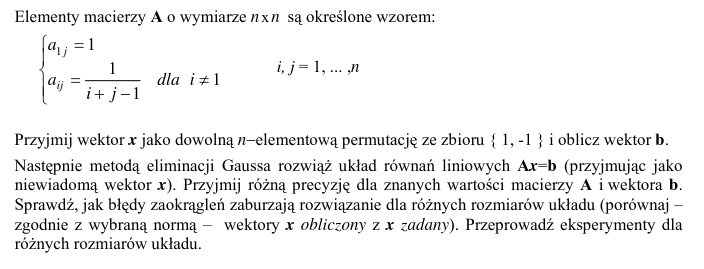

In [6]:
display.Image("./rysunek_2.png")

In [7]:
def gauss_elimination(A, b):
    n  = A.shape[0]
    b = b.reshape((-1, 1))

    x = np.zeros(n, dtype=A.dtype)

    a = np.hstack((A, b))

    for i in range(n):
        if a[i][i] == 0.0:
            sys.exit('Divide by zero detected!')

        for j in range(i+1, n):
            ratio = a[j][i]/a[i][i]

            for k in range(n+1):
                a[j][k] = a[j][k] - ratio * a[i][k]

    x[n-1] = a[n-1][n]/a[n-1][n-1]

    for i in range(n-2,-1,-1):
        x[i] = a[i][n]

        for j in range(i+1,n):
            x[i] = x[i] - a[i][j]*x[j]

        x[i] = x[i]/a[i][i]

           
    return x

In [8]:
def test1(solver_func, create_A, create_x, ns, types=['float64']):
    table = PrettyTable()
    table.title = f'Błąd dla poszczególnych precyzji'
    table.field_names = ['n'] + types


    for n in ns:
        x0 = create_x(n, 'float128')
        xs = []
        computed_xs = []

        for dtype in types:
            xs.append(x0.astype(dtype))
        
        
        for i, dtype in enumerate(types):
            A = create_A(n, dtype)
            b = get_b(A, xs[i])

            computed_xs.append(solver_func(A, b))
        
        norms = [norm(x, x_computed) for x, x_computed in zip(xs, computed_xs)]
        table.add_row([n]+norms)

    print(table)

In [9]:
ns = [i for i in range(1, 15)]
dtypes = ['float64', 'float32', 'float16']

## Wyniki

In [10]:
gauss_time = test1(gauss_elimination, create_matrix_A1, create_x, ns, dtypes)

+-------------------------------------------------------+
|            Błąd dla poszczególnych precyzji           |
+----+------------------------+---------------+---------+
| n  |        float64         |    float32    | float16 |
+----+------------------------+---------------+---------+
| 1  |          0.0           |      0.0      |   0.0   |
| 2  |          0.0           |      0.0      |   0.0   |
| 3  | 3.1086244689504383e-15 |  3.973643e-06 | 0.01563 |
| 4  | 3.774758283725532e-15  | 5.3077936e-05 |  0.1157 |
| 5  | 9.452993943170895e-12  |  0.0016908527 |  2.465  |
| 6  | 6.228835965534547e-11  |   0.03423637  |   1.93  |
| 7  | 2.600175677943842e-09  |   1.4587183   |  3.662  |
| 8  | 4.265395663061167e-08  |   3.9666986   |  5.266  |
| 9  |  5.43500676464248e-07  |   3.4150329   |  7.844  |
| 10 | 7.283076397545108e-05  |   1.0647228   |  0.5723 |
| 11 | 0.0017260893048604514  |   0.92691535  |  1.365  |
| 12 |  0.08406431026016954   |   6.1354117   |   2.15  |
| 13 |   2.046

## Uwarunkowanie układu

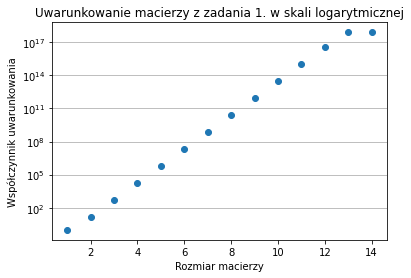

In [11]:
title = title = 'Uwarunkowanie macierzy z zadania 1. w skali logarytmicznej'
plot_cond(create_matrix_A1, ns, title, False)

## Wnioski
Błąd rozwiązania rośnie bardzo szybko, dlatego już dla rozmiarów powyżej 10, wyniki stają się bezużyteczne. Powodem tak złych wyników jest sama macierz A. Jak można zaobserwować na powyższym wykresie uwarunkowanie tej macierzy rośnie wykładniczo i osiąga bardzo duże wartośći.


# Zad2

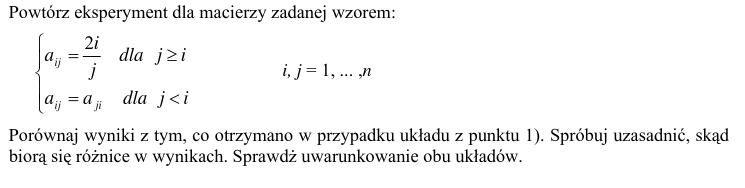

In [12]:
display.Image("./rysunek_3.png")

In [13]:
def create_matrix_A2(n, dtype=None):
    A = np.dstack(np.indices((n, n), dtype=dtype)+1)
    A = np.where(A[:, :, 1] >= A[:, :, 0], 2*A[:, :, 0]/A[:, :, 1], 2*A[:, :, 1]/A[:, :, 0])
    return A

In [14]:
ns = [5, 10, 15, 25, 50, 75, 100, 200]

## Wyniki

In [15]:
gauss_time = test1(gauss_elimination, create_matrix_A2, create_x, ns, dtypes)

+---------------------------------------------------------+
|             Błąd dla poszczególnych precyzji            |
+-----+------------------------+---------------+----------+
|  n  |        float64         |    float32    | float16  |
+-----+------------------------+---------------+----------+
|  5  | 3.108624468950438e-16  |  2.861023e-07 | 0.000977 |
|  10 | 1.254552017826427e-15  | 4.3511392e-07 | 0.00581  |
|  15 | 1.080617077301819e-15  | 1.1881192e-06 | 0.012985 |
|  25 | 8.895106873296755e-15  | 5.5122377e-06 | 0.05316  |
|  50 |  2.26885177312397e-14  | 1.9313096e-05 |  0.1305  |
|  75 | 7.403855306620244e-14  | 3.0659834e-05 |  0.339   |
| 100 | 1.0485501356072291e-13 | 5.9408547e-05 |  0.589   |
| 200 |  3.81314979591707e-13  |  0.0001768002 |   6.44   |
+-----+------------------------+---------------+----------+


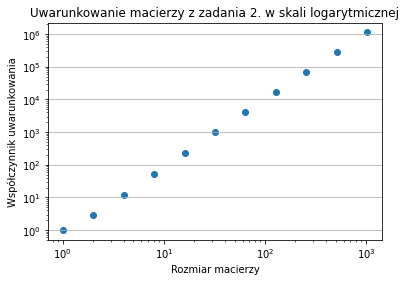

In [16]:
title = 'Uwarunkowanie macierzy z zadania 2. w skali logarytmicznej'
plot_cond(create_matrix_A2, [2**i for i in range(11)], title)

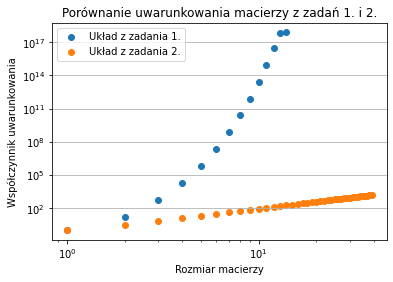

In [17]:
title = 'Porównanie uwarunkowania macierzy z zadań 1. i 2.'
plot_cond(create_matrix_A1, [i for i in range(1, 15)], title, label='Układ z zadania 1.')
plot_cond(create_matrix_A2, [i for i in range(1, 40)], title, label='Układ z zadania 2.')
plt.legend()

## Wnioski
W odróżnieniu od macierzy z zadania 1. obecna macierz utrzymuje niski współczynnik uwarunkowania. Ma to odzwierciedlenie w wyliczonych błędach, które nawet dla rozmiaru macierzy równego 200 są małe. W odróżnieniu od przypadku z zadania 1. tutaj można lepiej zaobserwoawać różnice w dokładności obliczeń w zależnośći od precyzji.

# Zad3

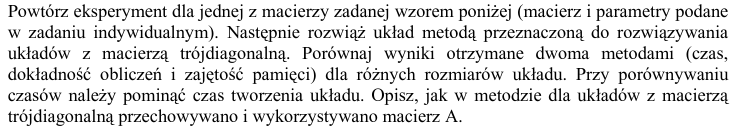

In [18]:
display.Image("./rysunek_4.png")

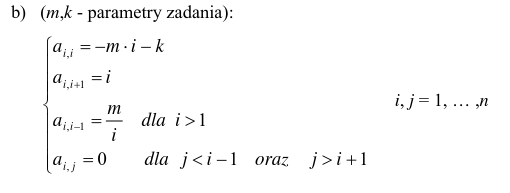

In [19]:
display.Image("./rysunek_5.png")

$$k=6, m=3$$

In [20]:
k=6
m=3

def create_matrix_A3b_thomas(n, dtype='float64'):
    b = -m*np.arange(1, n+1)-k
    c = np.arange(1, n)
    a = m/np.arange(2, n+1)
    
    return [a, b, c]


def create_matrix_A3b_gauss(n, dtype='float64'):
    A = np.zeros((n, n), dtype=dtype)
    np.fill_diagonal(A, -m*np.arange(1, n+1)-k)
    np.fill_diagonal(A[:-1,1:], np.arange(1, n))
    np.fill_diagonal(A[1:,:-1], m/np.arange(2, n+1))
    
    return A


def thomas_algo(T, r):
    a, b, c = T
    
    n = r.shape[0]
    ac, bc, cc, rc = map(np.array, (a, b, c, r))
    for it in range(1, n):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        rc[it] = rc[it] - mc*rc[it-1]
        	    
    xc = bc
    xc[-1] = rc[-1]/bc[-1]

    for il in range(n-2, -1, -1):
        xc[il] = (rc[il]-cc[il]*xc[il+1])/bc[il]
    
    return xc

In [21]:
def test2(ns):
    table = PrettyTable()
    table.title = 'Czasy wykonywania alogorytmów w sekundach'
    table.field_names = ['n', 'Gauss', 'Thomas']

    times = [[] for _ in range(2)]
    for i, n in enumerate(ns):
        x = create_x(n)
        A = create_matrix_A3b_gauss(n)
        b = get_b(A, x)

        start = time()
        computed_x = gauss_elimination(A, b)
        end = time()
        times[0].append(end-start)
        
        A = create_matrix_A3b_thomas(n)

        start = time()
        computed_x = thomas_algo(A, b)
        end = time()
        times[1].append(end-start)
        
        
        
        table.add_row([n, times[0][i], times[1][i]])
    print(table)
    return times

In [22]:
def test3(ns, dtype='float64'):
    table = PrettyTable()
    table.title = f'Dokładności obliczeń algorytmów dla typu:{dtype}'
    table.field_names = ['n', 'Gauss', 'Thomas']

    precisions = [[] for _ in range(2)]
    for i, n in enumerate(ns):
        x = create_x(n)
        A = create_matrix_A3b_gauss(n)
        b = get_b(A, x)

        computed_x = gauss_elimination(A, b)
        precisions[0].append(norm(x, computed_x))
        
        A = create_matrix_A3b_thomas(n)

        computed_x = thomas_algo(A, b)
        precisions[1].append(norm(x, computed_x))
        
        
        table.add_row([n, precisions[0][i], precisions[1][i]])
    print(table)
    return precisions

In [23]:
ns = [5, 10, 15, 25, 50, 75, 100, 200, 300, 400]

## Wyniki

## Czasy rozwiazania układu równań w zależnośći od algorytmu i rozmiaru układu

In [24]:
times = test2(ns)

+------------------------------------------------------+
|      Czasy wykonywania alogorytmów w sekundach       |
+-----+-----------------------+------------------------+
|  n  |         Gauss         |         Thomas         |
+-----+-----------------------+------------------------+
|  5  | 0.0001327991485595703 |  5.7220458984375e-05   |
|  10 | 0.0010221004486083984 | 0.00013303756713867188 |
|  15 | 0.0020911693572998047 | 0.00011515617370605469 |
|  25 |   0.0070953369140625  | 0.00014472007751464844 |
|  50 |  0.05832362174987793  |  0.00023651123046875   |
|  75 |  0.19103789329528809  | 0.0003674030303955078  |
| 100 |   0.4847218990325928  | 0.0009531974792480469  |
| 200 |   3.736295461654663   | 0.0008718967437744141  |
| 300 |   17.579717874526978  | 0.0015783309936523438  |
| 400 |   28.51323890686035   | 0.0017549991607666016  |
+-----+-----------------------+------------------------+


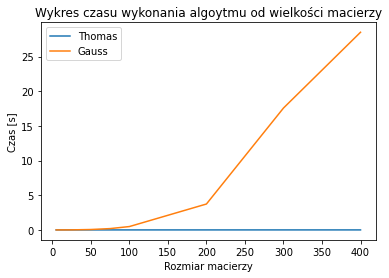

In [25]:
gauss_time, thomas_time = times
plt.plot(ns, thomas_time, label='Thomas')
plt.plot(ns,  gauss_time, label='Gauss')
plt.title('Wykres czasu wykonania algoytmu od wielkości macierzy')
plt.ylabel('Czas [s]')
plt.xlabel('Rozmiar macierzy')
plt.legend()

## Dokładność rozwiazania układu równań w zależnośći od algorytmu i rozmiaru układu

In [26]:
times = test3(ns)

+--------------------------------------------------+
| Dokładności obliczeń algorytmów dla typu:float64 |
+------+--------------------------------+----------+
|  n   |             Gauss              |  Thomas  |
+------+--------------------------------+----------+
|  5   |              0.0               |   0.0    |
|  10  |     1.1102230246251566e-17     |   0.0    |
|  15  |     7.401486830834377e-17      |   0.0    |
|  25  |     7.993605777301127e-17      |   0.0    |
|  50  |     6.439293542825907e-17      |   0.0    |
|  75  |     6.957397620984315e-17      |   0.0    |
| 100  |     7.993605777301127e-17      |   0.0    |
| 200  |     8.992806499463769e-17      |   0.0    |
| 300  |     8.178642948071987e-17      |   0.0    |
| 400  |     8.271161533457416e-17      |   0.0    |
+------+--------------------------------+----------+


In [27]:
times = test3(ns, 'float32')

+--------------------------------------------------+
| Dokładności obliczeń algorytmów dla typu:float32 |
+------+--------------------------------+----------+
|  n   |             Gauss              |  Thomas  |
+------+--------------------------------+----------+
|  5   |     1.1102230246251565e-16     |   0.0    |
|  10  |     6.661338147750939e-17      |   0.0    |
|  15  |     6.661338147750939e-17      |   0.0    |
|  25  |     7.549516567451065e-17      |   0.0    |
|  50  |     6.661338147750939e-17      |   0.0    |
|  75  |     9.177843670234627e-17      |   0.0    |
| 100  |     7.105427357601002e-17      |   0.0    |
| 200  |     7.771561172376095e-17      |   0.0    |
| 300  |     7.734553738221924e-17      |   0.0    |
| 400  |      8.18789480661053e-17      |   0.0    |
+------+--------------------------------+----------+


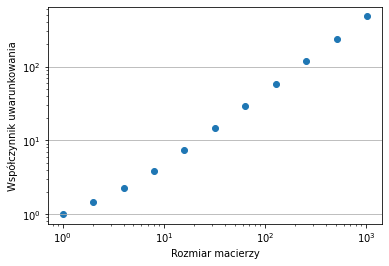

In [28]:
title = 'Uwarunkowanie macierzy z zadania 3. w skali logarytmicznej'
plot_cond(create_matrix_A3b_gauss, [2**i for i in range(11)])

## Wnioski

Przeprowadzone testy czasowe zgadzają się z założeniami, że algorytm Thomasa ma złożoność obliczeniową $O(n)$, a elminacja Gaussa $O(n^3)$. Dla algorytmu Thomasa macierz była przechowywana jako trzy tablice odpowiadające trzem przekątnym, dzięki czemu złożoność pamięciowa algorytmu Thomasa wynosi $O(n)$ i jest mniejsza od złożoności pamięciowej eliminacji Gaussa, która jest równa $O(n^2)$.
Jeśli chodzi  o dokładność obu metod, to nie udało się zaobserwować różnic. Błędy algorytmu Thomasa są równe 0, a eliminacj Gaussa bardzo bliskie zeru. Jest to wynikiem bardzo dobrego uwarunkowania macierzy.